# 07. 딥 러닝(Deep Learning) 개요

## 07-08 케라스(Keras) 훑어보기

### 1. 전처리(Preprocessing)
- Tokenizer() : 토큰화와 정수 인코딩을 위해 사용

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- pad_sequence(): 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춤. 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움

In [2]:
# 첫번째 인자: 패딩을 진행할 데이터
# maxlen: 모든 데이터에 대하여 정규화 할 길이
# padding: pre를 선택하면 앞에 0 채우고 post를 선택하면 뒤에 0채움
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 2. 워드 임베딩(Word Embedding)
- 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것
- 원-핫 벡터는 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없음
- 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수
- Embedding() : Embedding()은 단어를 밀집 벡터로 만드는 역할

```python
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7 # 단어의 개수
embedding_dim = 2 # 출력 차원
Embedding(vocab_size, embedding_dim, input_length=5) # input_length: 입력 시퀀스 길이

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.
```

### 3. 모델링(Modeling)

- Sequential(): 입력층, 은닉층, 출력층을 구성하기 위해 Sequential()을 사용

``` python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가
```

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Embedding

vocab_size = 7 # 단어의 개수
output_dim = 2 # 출력 차원

# Embedding을 통해 생성하는 임베딩 층 추가 예시
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length = 5))

In [12]:
# 전결합층 추가 예시
model = Sequential()

#Dense(출력뉴런수, 입력차원, 활성화함수)
model.add(Dense(1, input_dim=3, activation='relu'))

- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 은닉층에 주로 사용되는 활성화 함수.

- Dense(1, input_dim=3, activation='relu') 시각화
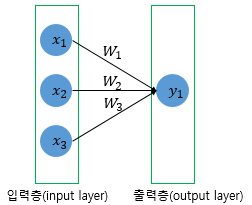

In [13]:
# 전결합층 더 추가
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # 8은 출력층이 아닌 은닉층 뉴런
model.add(Dense(1, activation='sigmoid')) # 출력층

- Dense(8, input_dim=4, activation='relu'), add(Dense(1, activation='sigmoid') 시각화
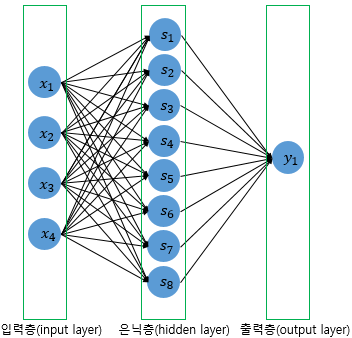

- 이 외에도 LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있음
- summary() : 모델의 정보를 요약해서 보여줌

In [14]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일(Compile)과 훈련(Training)

- compile() : 모델을 기계가 이해할 수 있도록 컴파일. 손실 함수와 옵티마이저, 메트릭 함수를 선택

In [15]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

|문제 유형|손실 함수명|출력층의 활성화 함수명|참고 실습|
|---|---|---|---|
|회귀 문제|mean_squared_error|-|선형 회귀 실습|
|다중 클래스 분류|categorical_crossentropy|소프트맥스|로이터 뉴스 분류하기|
|다중 클래스 분류|sparse_categorical_crossentropy|소프트맥스|양방향 LSTM를 이용한 품사 태깅|
|이진 분류|binary_crossentropy|시그모이드|IMDB 리뷰 감성 분류하기|

- fit() : 모델을 학습

```python
# 위의 compile() 코드의 연장선상인 코드
# model.fit(훈련데이터, 레이블데이터, 총 훈련횟수, 배치크기)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

# validation_split = 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
```

- verbose = 학습 중 출력되는 문구를 설정
    - 0 : 아무 것도 출력 X
    - 1 : 훈련의 진행도를 보여주는 진행 막대 출력
    - 2 : 미니 배치마다 손실 정보 출력
    
```python
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
        
        
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000
```

### 5. 평가(Evaluation)와 예측(Prediction) 

- evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가

```python
# 위의 fit() 코드의 연장선상인 코드
# 테스트 데이터, 레이블 테스트 데이터, 배치크기
model.evaluate(X_test, y_test, batch_size=32)
```

- predict() : 임의의 입력에 대한 모델의 출력값을 확인
```python
# 위의 fit() 코드의 연장선상인 코드
# 예측데이터, 배치크기
model.predict(X_input, batch_size=32)
```

### 6. 모델의 저장(Save)과 로드(Load)
- save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.
- load_model() : 저장해둔 모델을 불러옵니다.

```python
model.save("model_name.h5")

from tensorflow.keras.models import load_model
model = load_model("model_name.h5")
```

## 07-09 케라스의 함수형 API(Keras Functional API)

### 1. Sequential API로 만든 모델

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

### 2. Functional API로 만든 모델

#### (1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
- functional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해줘야 함

In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [21]:
inputs = Input(shape=(10,))

In [22]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가

In [23]:
inputs = Input(shape=(10,)) # 입력 크기 정의
hidden1 = Dense(64, activation='relu')(inputs) # 이전층을 다음층 함수의 입력으로 사용
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # <- 새로 추가 / 입력 출력 정의

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

In [25]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

#### (2) 선형 회귀(Linear Regression)

In [26]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300


C:\Users\YOORA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 2865.3420 - mse: 2865.3420
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 353.5701 - mse: 353.5701
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 44.5148 - mse: 44.5148
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 6.4872 - mse: 6.4872
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8075 - mse: 1.8075
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2310 - mse: 1.2310
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1595 - mse: 1.1595
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1500 - mse: 1.1500
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1482 - mse: 1.1482
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1473 - mse: 1.1473
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1466 -

1/1 [==============================] - 0s 4ms/step - loss: 1.0822 - mse: 1.0822
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0820 - mse: 1.0820
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0818 - mse: 1.0818
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0816 - mse: 1.0816
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0815 - mse: 1.0815
Epoch 181/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0813 - mse: 1.0813
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0811 - mse: 1.0811
Epoch 183/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0809 - mse: 1.0809
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0808 - mse: 1.0808
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0806 - mse: 1.0806
Epoch 186/300
1/1 [==============================] - 0s 5ms/step - loss: 1

#### (3) 로지스틱 회귀(Logistic Regression)

In [27]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

#### (4) 다중 입력을 받는 모델(model that accepts multiple inputs)

``` python
# 최종 완성된 다중 입력, 다중 출력 모델의 예
model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])
```

In [29]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

#### (5) RNN(Recurrence Neural Network) 은닉층 사용하기

In [30]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

# 하나의 특성(feature)에 50개의 시점(time-step)을 입력
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

#### (6) 다르게 보이지만 동일한 표기

```python
# 같은 코드를 한줄로 표기
result = Dense(128)(input)

# 같은 코드를 두줄로 표기
dense = Dense(128)
result = dense(input)
```

## 07-10 케라스 서브클래싱 API(Keras Subclassing API)

### 1. 서브클래싱 API로 구현한 선형 회귀

In [35]:
import tensorflow as tf

In [36]:
class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

    def call(self, x):
        y_pred = self.linear_layer(x)
        return y_pred

In [37]:
model = LinearRegression()

In [38]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [42]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 171ms/step - loss: 4748.8896 - mse: 4748.8896
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 585.4631 - mse: 585.4631
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 73.1828 - mse: 73.1828
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 10.1489 - mse: 10.1489
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 2.3913 - mse: 2.3913
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.4350 - mse: 1.4350
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3156 - mse: 1.3156
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2992 - mse: 1.2992
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2955 - mse: 1.2955
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2933 - mse: 1.2933
Epoch 11/300
1/1 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 5ms/step - loss: 1.1199 - mse: 1.1199
Epoch 176/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1194 - mse: 1.1194
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1189 - mse: 1.1189
Epoch 178/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1184 - mse: 1.1184
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1179 - mse: 1.1179
Epoch 180/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1175 - mse: 1.1175
Epoch 181/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1170 - mse: 1.1170
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1165 - mse: 1.1165
Epoch 183/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1161 - mse: 1.1161
Epoch 184/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1156 - mse: 1.1156
Epoch 185/300
1/1 [==============================] - 0s 6ms/step - loss: 1

### 2. 언제 서브클래싱 API를 써야 할까?

- Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합

### 3. 세 가지 구현 방식 비교.

#### (1) Sequential API

- 장점: 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단
- 단점:다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합X


#### (2) Functtional API
- 장점: Sequential API로는 구현하기 어려운 복잡한 모델들을 구현
- 단점: 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 함

```python
# 선형 회귀 구현 코드의 일부 발췌

inputs = Input(shape=(1,)) # <-- 해당 부분
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)
```

#### (3) Subclassing API
- 장점: Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
- 단점: 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

## 07-11 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

### 1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
- 다층 퍼셉트론(MLP): 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망
- 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태
- 피드 포워드 신경망: 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망

### 2. 케라스의 texts_to_matrix() 이해하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
#binary 모드
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [6]:
# tfidf 모드
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [7]:
# freq 모드
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [10]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [11]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [12]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [14]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [15]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [18]:
# null 값 확인
data.isnull().values.any()

False

In [19]:
# 중복 확인
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


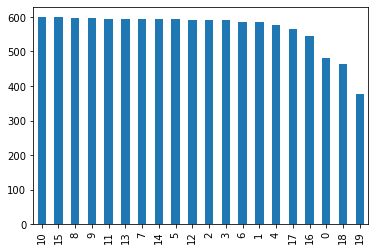

In [20]:
# 레이블 값 분포 시각화
data['target'].value_counts().plot(kind='bar');

In [21]:
# 레이블 값 구체적인 개수 확인
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [22]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [23]:
vocab_size = 10000 # 실습에서 사용할 최대 단어
num_classes = 20

In [24]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [25]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [26]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [27]:
# 불용어에 해당하는 the가 빈도수 상위 1번 단어가 됨
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


### 4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5)) # 과적합 방지
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) # 과적합 방지
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

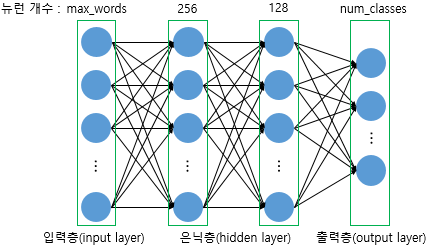

In [30]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 7ms/step - loss: 2.2449 - accuracy: 0.3462 - val_loss: 0.9517 - val_accuracy: 0.8136
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 0.8692 - accuracy: 0.7590 - val_loss: 0.4591 - val_accuracy: 0.8887
Epoch 3/5
80/80 [==============================] - 0s 5ms/step - loss: 0.4247 - accuracy: 0.8868 - val_loss: 0.3557 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.9361 - val_loss: 0.3247 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 0s 6ms/step - loss: 0.1666 - accuracy: 0.9598 - val_loss: 0.3083 - val_accuracy: 0.9117
binary 모드의 테스트 정확도: 0.8311205506324768
Epoch 1/5
80/80 [==============================] - 1s 7ms/step - loss: 2.8415 - accuracy: 0.2313 - val_loss: 1.7508 - val_accuracy: 0.6908
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 1.5126 - accuracy: 0.6082 - val_loss: 0.7492 - val_accur

## 07-12 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

### 1. 기존 N-gram 언어 모델의 한계
- n-gram 언어 모델은 언어 모델링에 바로 앞 n-1개의 단어를 참고
- n-gram 언어 모델은 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못하는 희소 문제(sparsity problem)가 있음

### 2. 단어의 의미적 유사성
- 희소 문제는 기계가 단어의 의미적 유사성을 알수 있다면 해결 가능
- 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계한다면 훈련 코퍼스에 없는 단어 시퀀스에 대한 예측이라도 유사한 단어가 사용된 단어 시퀀스를 참고하여 보다 정확한 예측 가능
- 이러한 아이디어를 반영한 언어 모델이 신경망 언어 모델 NNLM
- 단어 벡터 간 유사도를 구할 수 있는 벡터를 얻어내는 워드 임베딩(word embedding) 의 아이디어

### 3. 피드 포워드 신경망 언어 모델(NNLM)
> 예문 : "what will the fat cat sit on"

#### (1) 기계가 단어를 인식할 수 있도록 모든 단어를 수치화
```
what = [1, 0, 0, 0, 0, 0, 0]
will = [0, 1, 0, 0, 0, 0, 0]
the = [0, 0, 1, 0, 0, 0, 0]
fat = [0, 0, 0, 1, 0, 0, 0]
cat = [0, 0, 0, 0, 1, 0, 0]
sit = [0, 0, 0, 0, 0, 1, 0]
on = [0, 0, 0, 0, 0, 0, 1]
```
- NNLM은 n-gram 언어 모델처럼 다음 단어를 예측할 때, 앞의 모든 단어를 참고
- NNLM의 구조
    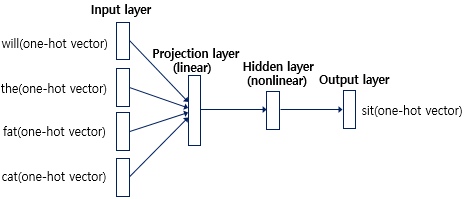
    - 입력층(input layer)을 보면 앞에서 윈도우의 크기는 4로 정하였으므로 입력은 4개의 단어 'will, the, fat, cat'의 원-핫 벡터
- 4개의 원-핫 벡터를 입력 받은 NNLM은 다음층인 투사층(projection layer)을 지남
    - 투사층이라고 명명한 이 층은 일반 은닉층과 다르게 가중치 행렬과의 곱셈은 이루어지지만 활성화 함수 존재X
    - 투사층의 크기를 M으로 설정하면, 각 입력 단어들은 투사층에서 V × M 크기의 가중치 행렬과 곱해집니다. 여기서 V는 단어 집합의 크기를 의미
- 원-핫 벡터와 가중치 곱 도식화
    ![img](https://wikidocs.net/images/page/45609/nnlm2_renew.PNG)
    - 각 원-핫 벡터 $x$로 표기
    - 원-핫 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일 = 룩업 테이블(lookup table)
- 룩업 테이블 후에는 V차원을 가지는 원-핫 벡터는 이보다 더 차원이 작은 M차원의 벡터로 맵핑
- 벡터들은 초기에는 랜덤한 값을 가지지만 학습 과정에서 값이 계속 변경되는데 이 단어 벡터를 임베딩 벡터(embedding vector)
- 각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결
    ![img](https://wikidocs.net/images/page/45609/nnlm3_renew.PNG)
    - 투사층의 식 표현
    $$p^{layer} = (lookup(x_{t-n}); ...; lookup(x_{t-2}); lookup(x_{t-1})) = (e_{t-n}; ...; e_{t-2}; e_{t-1})$$
- 투사층은 활성화 함수가 존재하지 않는 선형층(linear layer)
    ![img](https://wikidocs.net/images/page/45609/nnlm4.PNG)
    - 투사층의 결과는 h의 크기를 가지는 은닉층을 지남
    - 은닉층의 식 표현
    $$h^{layer} = tanh(W_{h}p^{layer} + b_{h})$$

- 은닉층의 출력은 V의 크기를 가지는 출력층으로 향함
![img](https://wikidocs.net/images/page/45609/nnlm5_final.PNG)
    - V차원의 벡터는 소프트맥스 함수를 지나면서 벡터의 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 바뀜
    - 출력층의 식 표현
    $$\hat{y} = softmax(W_{y}h^{layer} + b_{y})$$
    - $\hat{y}$는 실제값. 즉, 실제 정답에 해당되는 단어인 원-핫 벡터의 값에 가까워져야 함


#### NNLM의 핵심
- 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습한다면 결과적으로 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻게되는 것

### 4. NNLM의 이점과 한계

#### (1) 기존 모델에서의 개선점
- 단어의 유사도 계산 -> 희소문제 해결

#### (2) 고정된 길이의 입력
-  NNLM은 n-gram 언어 모델과 마찬가지로 다음 단어를 예측하기 위해 모든 이전 단어를 참고하는 것이 아니라 정해진 n개의 단어만을 참고할 수 있음


### 